In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.formula.api as smf
#pckage to split data into train and test
from sklearn.model_selection import train_test_split
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
# calculating confusion matricss
from sklearn import metrics
#for labeling 
from sklearn import preprocessing
#for roc and auc curve
from sklearn.metrics import roc_curve, auc
#
import statsmodels.api as sm

In [2]:
#Import the file
A=pd.read_excel('German Credit.xlsx')

In [3]:
# Print Heade of the file
A.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [4]:
# Print all Column names
A.columns

Index(['Creditability', 'CreditAmount', 'DurationOfCreditInMonths'], dtype='object')

In [5]:
A['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [ ]:
# A.boxplot(column='Creditability',by='CreditAmount')

In [6]:
# for the initial study consider 
data = A[['Creditability','CreditAmount']]

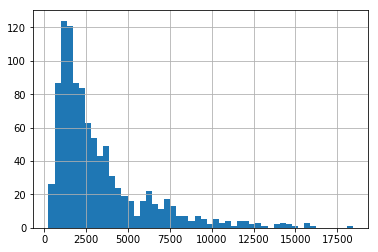

In [7]:
A['CreditAmount'].hist(bins=50)

In [8]:
amountIntervalPoints=np.array([0,500,1000,1500,2000,2500,5000,7500,10000,15000,20000])

In [9]:
amountIntervals = [(amountIntervalPoints[i]+int(i != 0),amountIntervalPoints[i + 1]) for i in np.arange(len(amountIntervalPoints)-1)]
amountIntervals

[(0, 500),
 (501, 1000),
 (1001, 1500),
 (1501, 2000),
 (2001, 2500),
 (2501, 5000),
 (5001, 7500),
 (7501, 10000),
 (10001, 15000),
 (15001, 20000)]

In [10]:
# creditablity table prepration
Creditability0 = []
Creditability1 = []
for interval in amountIntervals:
    subData = data[data.CreditAmount >= interval[0]]
    subData = subData[subData.CreditAmount <= interval[1]]
    Creditability0.append(sum(subData.Creditability == 0))
    Creditability1.append(sum(subData.Creditability == 1))

In [11]:
Creditability0

[3, 34, 51, 33, 26, 75, 34, 20, 21, 3]

In [12]:
Creditability1

[15, 64, 139, 93, 79, 200, 68, 26, 14, 2]

In [13]:
#creating amount interval data frame
amountIntervalsDf = pd.DataFrame(amountIntervals,columns = ['intervalleftside','intervalrightside'])
amountIntervalsDf

,intervalleftside,intervalrightside
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [14]:
#credibility df we have us stack because creditability is a list same as cbind and r bind in R
tempdf =pd.DataFrame(np.column_stack([Creditability0,Creditability1]), columns = ['Creditability0','Creditability1'])
tempdf

,Creditability0,Creditability1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


In [15]:
# creditworthiness data frame
compareCreditworthinessdf= pd.concat([amountIntervalsDf.reset_index(drop=True), tempdf],axis=1)
compareCreditworthinessdf


,intervalleftside,intervalrightside,Creditability0,Creditability1
0,0,500,3,15
1,501,1000,34,64
2,1001,1500,51,139
3,1501,2000,33,93
4,2001,2500,26,79
5,2501,5000,75,200
6,5001,7500,34,68
7,7501,10000,20,26
8,10001,15000,21,14
9,15001,20000,3,2


In [16]:
compareCreditworthinessdf['total'] = compareCreditworthinessdf.Creditability0+compareCreditworthinessdf.Creditability1
compareCreditworthinessdf

,intervalleftside,intervalrightside,Creditability0,Creditability1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


In [17]:
compareCreditworthinessdf.Creditability0=round(compareCreditworthinessdf.Creditability0/compareCreditworthinessdf.total,2)
compareCreditworthinessdf.Creditability1=round(compareCreditworthinessdf.Creditability1/compareCreditworthinessdf.total,2)
compareCreditworthinessdf

,intervalleftside,intervalrightside,Creditability0,Creditability1,total
0,0,500,0.17,0.83,18
1,501,1000,0.35,0.65,98
2,1001,1500,0.27,0.73,190
3,1501,2000,0.26,0.74,126
4,2001,2500,0.25,0.75,105
5,2501,5000,0.27,0.73,275
6,5001,7500,0.33,0.67,102
7,7501,10000,0.43,0.57,46
8,10001,15000,0.60,0.40,35
9,15001,20000,0.60,0.40,5


Text(0.5,1,'Creditworthiness plot for Credibility == 0')

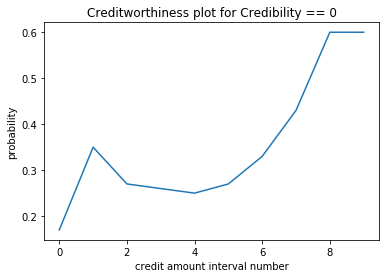

In [18]:
# creiditworthiness plot ## creditability ==0
plt.plot(compareCreditworthinessdf.Creditability0)
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title("Creditworthiness plot for Credibility == 0")

Text(0.5,1,'Creditworthiness plot for Credibility == 1')

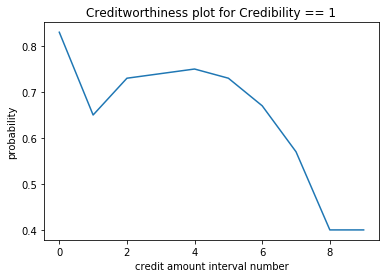

In [19]:
# creiditworthiness plot ## creditability ==1
plt.plot(compareCreditworthinessdf.Creditability1)
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title("Creditworthiness plot for Credibility == 1")

In [20]:
# Prepare input data for the model
X= np.array(data.CreditAmount)
Y= data.Creditability.astype('category')

In [21]:
#fit lr model

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=1)

In [24]:
logit = sm.Logit(Y_train,sm.add_constant(X_train))

In [25]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.597801
         Iterations 5


In [26]:
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.019     
Dependent Variable: Creditability    AIC:              840.9208  
Date:               2018-11-21 17:41 BIC:              850.0230  
No. Observations:   700              Log-Likelihood:   -418.46   
Df Model:           1                LL-Null:          -426.75   
Df Residuals:       698              LLR p-value:      4.6449e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      1.2460     0.1299    9.5924   0.0000    0.9914    1.5006
x1        -0.0001     0.0000   -4.0571   0.0000   -0.0002   -0.0001
=================================================================

"""

In [31]:
# test accuracy
def get_predictions(Y_test,model):
    y_pred_df = pd.DataFrame( {'actual':Y_test,
                              'predicted_prob': lg.predict(sm.add_constant(X_test) ) } )
    return y_pred_df

In [32]:
X_test[0:5]

array([6842, 1237, 7308, 1403, 1568], dtype=int64)

In [34]:
y_pred_df = get_predictions(X_test,lg)
y_pred_df['originalCredibility']=np.array(Y_test)
y_pred_df[0:5]

,actual,predicted_prob,originalCredibility
0,6842,0.613388,1
1,1237,0.751042,0
2,7308,0.600644,1
3,1403,0.747467,1
4,1568,0.743879,1


In [35]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > .6 else 0)

In [36]:
y_pred_df[0:10]

,actual,predicted_prob,originalCredibility,predicted
0,6842,0.613388,1,1
1,1237,0.751042,0,1
2,7308,0.600644,1,1
3,1403,0.747467,1,1
4,1568,0.743879,1,1
5,14421,0.399551,0,0
6,1275,0.750226,1,1
7,15672,0.365688,0,0
8,1360,0.748396,1,1
9,1382,0.747921,1,1


In [40]:
#build a confusion matrix

def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted,[1,0])
    sns.heatmap(cm,annot=True, fmt='.2f' , xticklabels= [ 'Default','Nodefault'],yticklabels=['Default','Nodefault'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

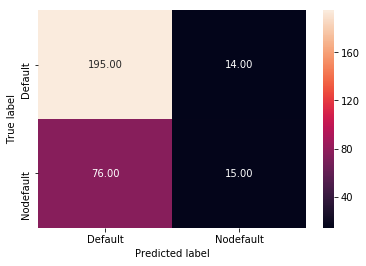

In [41]:
draw_cm(y_pred_df.originalCredibility,y_pred_df.predicted)

In [ ]:
# true positive rate senstivity
# 195 Fals negative 14 true positive 76 tn 15 fp
